# **Predicción y Análisis de la Cancelación de Servicios en TelecomX** 

## **Introducción**
En este reto propuesto por **AluraLatam** y **Oracle**,el objetivo es poner aprueba lo aprendido en la ruta de Estadistica y Machine Learning.

Esta empresa 'TelecomX' quiere analizar identificar y poder predecir a sus clientes que estan en riesgo de cancelar sus servicios, esto con el objetivo de poder minimizar y evitar la perdida de clientes. Este proyecto es la continuacion de un reto anterior, donde previamnete ya se limpio, transformo y exploro un conjunto de datos, con el que seguiremos trabajando para poder identificar los factores mas importantes a la hora de que un cliente tiene riesgo abandonar los servicios.

Asi mismo generaremos un modelo para predecir si un cliente cancelara sus servicios y asi poder generar estrategias para combatir esta situacion.

### **Importando Librerias**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### **Importando los datos**

In [31]:
data = pd.read_csv('clean_data_evasion_clientes.csv')

### **Primera vista de los datos**

In [32]:
data.head()

,id,contrato_cancelado,genero,cliente_tercera_edad,conyugue,dependientes,antiguedad(meses),servicio_telefonico,multilinea,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,streaming_TV,streaming_movies,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,total_pagado,cuenta_diaria
0,0002-ORFBO,False,Female,False,True,True,9,True,False,True,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,True,True,True,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,True,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,True,False,True,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,True,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.796667


In [33]:
data.shape

(7267, 23)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7267 non-null   object 
 1   contrato_cancelado       7043 non-null   object 
 2   genero                   7267 non-null   object 
 3   cliente_tercera_edad     7267 non-null   bool   
 4   conyugue                 7267 non-null   bool   
 5   dependientes             7267 non-null   bool   
 6   antiguedad(meses)        7267 non-null   int64  
 7   servicio_telefonico      7267 non-null   bool   
 8   multilinea               7267 non-null   bool   
 9   servicio_internet        7267 non-null   bool   
 10  tipo_conexion            7267 non-null   object 
 11  seguridad_online         7267 non-null   bool   
 12  respaldos                7267 non-null   bool   
 13  proteccion_dispositivos  7267 non-null   bool   
 14  soporte_tecnico         

## **Eliminando columnas irrelevantes**

In [35]:
data.drop('id',axis=1,inplace=True)
data.head()

,contrato_cancelado,genero,cliente_tercera_edad,conyugue,dependientes,antiguedad(meses),servicio_telefonico,multilinea,servicio_internet,tipo_conexion,...,proteccion_dispositivos,soporte_tecnico,streaming_TV,streaming_movies,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,total_pagado,cuenta_diaria
0,False,Female,False,True,True,9,True,False,True,DSL,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.186667
1,False,Male,False,False,False,9,True,True,True,DSL,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,True,Male,False,False,False,4,True,False,True,Fiber optic,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,True,Male,True,True,False,13,True,False,True,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,True,Female,True,True,False,3,True,False,True,Fiber optic,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.796667


## **Mapeo Binario de Variables Dicotómicas**

In [36]:
data = data.replace({True:1,False:0})

/tmp/ipykernel_19685/1017057720.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True:1,False:0})


In [37]:
data

,contrato_cancelado,genero,cliente_tercera_edad,conyugue,dependientes,antiguedad(meses),servicio_telefonico,multilinea,servicio_internet,tipo_conexion,...,proteccion_dispositivos,soporte_tecnico,streaming_TV,streaming_movies,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,total_pagado,cuenta_diaria
0,0.0,Female,0,1,1,9,1,0,1,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0.0,Male,0,0,0,9,1,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,1.0,Male,0,0,0,4,1,0,1,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,1.0,Male,1,1,0,13,1,0,1,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,1.0,Female,1,1,0,3,1,0,1,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,0,0,13,1,0,1,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,1.0,Male,0,1,0,22,1,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,0.0,Male,0,0,0,2,1,0,1,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,0.0,Male,0,1,1,67,1,0,1,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [38]:
data['contrato_cancelado'].unique()

array([ 0.,  1., nan])

In [39]:
data_can_predict = data[data['contrato_cancelado'].isnull()]

In [40]:
data_can_predict

,contrato_cancelado,genero,cliente_tercera_edad,conyugue,dependientes,antiguedad(meses),servicio_telefonico,multilinea,servicio_internet,tipo_conexion,...,proteccion_dispositivos,soporte_tecnico,streaming_TV,streaming_movies,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,total_pagado,cuenta_diaria
30,NaN,Female,0,0,0,11,1,1,1,Fiber optic,...,0,0,0,0,Month-to-month,1,Bank transfer (automatic),79.00,929.30,2.633333
75,NaN,Male,0,0,0,71,1,0,0,sin conexion,...,0,0,0,0,Two year,1,Credit card (automatic),19.90,1355.10,0.663333
96,NaN,Male,0,0,0,29,1,0,1,DSL,...,0,1,0,0,One year,1,Electronic check,58.75,1696.20,1.958333
98,NaN,Female,1,0,0,5,1,0,1,DSL,...,0,1,0,0,Month-to-month,0,Credit card (automatic),59.90,287.85,1.996667
175,NaN,Male,1,1,0,65,1,1,1,Fiber optic,...,1,0,1,1,One year,1,Bank transfer (automatic),103.15,6792.45,3.438333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,NaN,Female,0,0,0,14,1,1,1,DSL,...,0,0,0,0,One year,1,Mailed check,54.25,773.20,1.808333
7180,NaN,Female,0,1,0,49,0,0,1,DSL,...,0,0,1,0,Month-to-month,0,Bank transfer (automatic),40.65,2070.75,1.355000
7211,NaN,Male,0,0,0,9,1,1,1,Fiber optic,...,0,0,0,0,Month-to-month,1,Electronic check,76.25,684.85,2.541667
7239,NaN,Female,0,1,1,67,1,0,0,sin conexion,...,0,0,0,0,Two year,1,Bank transfer (automatic),19.25,1372.90,0.641667


In [41]:
data = data.drop(data_can_predict.index)

In [42]:
data

,contrato_cancelado,genero,cliente_tercera_edad,conyugue,dependientes,antiguedad(meses),servicio_telefonico,multilinea,servicio_internet,tipo_conexion,...,proteccion_dispositivos,soporte_tecnico,streaming_TV,streaming_movies,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,total_pagado,cuenta_diaria
0,0.0,Female,0,1,1,9,1,0,1,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0.0,Male,0,0,0,9,1,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,1.0,Male,0,0,0,4,1,0,1,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,1.0,Male,1,1,0,13,1,0,1,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,1.0,Female,1,1,0,3,1,0,1,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,0,0,13,1,0,1,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,1.0,Male,0,1,0,22,1,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,0.0,Male,0,0,0,2,1,0,1,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,0.0,Male,0,1,1,67,1,0,1,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   contrato_cancelado       7043 non-null   float64
 1   genero                   7043 non-null   object 
 2   cliente_tercera_edad     7043 non-null   int64  
 3   conyugue                 7043 non-null   int64  
 4   dependientes             7043 non-null   int64  
 5   antiguedad(meses)        7043 non-null   int64  
 6   servicio_telefonico      7043 non-null   int64  
 7   multilinea               7043 non-null   int64  
 8   servicio_internet        7043 non-null   int64  
 9   tipo_conexion            7043 non-null   object 
 10  seguridad_online         7043 non-null   int64  
 11  respaldos                7043 non-null   int64  
 12  proteccion_dispositivos  7043 non-null   int64  
 13  soporte_tecnico          7043 non-null   int64  
 14  streaming_TV             7043

## **Separar conjunto de datos en datos de entrenamiento y prueba**

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = data.drop('contrato_cancelado',axis=1)
y = data['contrato_cancelado']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

## **Transformacion de Variables Categoricas con OneHotEncoder**

In [47]:
data_variables_categoricas = ['genero','tipo_conexion','tipo_contrato','metodo_pago']

In [48]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [49]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),data_variables_categoricas),
    remainder='passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

In [50]:
X_train = one_hot.fit_transform(X_train)
X_test = one_hot.transform(X_test)

## **Proporcion de Cancelación**

In [51]:
data['contrato_cancelado'].value_counts(normalize=True)

contrato_cancelado
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64

In [52]:
data['contrato_cancelado'].value_counts()

contrato_cancelado
0.0    5174
1.0    1869
Name: count, dtype: int64

## **Balanceo de Clases (Oversampling)**

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
oversampling = SMOTE()
X_balanceada,y_balanceada = oversampling.fit_resample(X_train,y_train)

In [55]:
y_balanceada.value_counts(normalize=True)

contrato_cancelado
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

## **Normalizacion de datos**

In [56]:
# normalizacion
from sklearn.preprocessing import MinMaxScaler

In [57]:
normalizacion = MinMaxScaler()
X_train_normalizada = normalizacion.fit_transform(X_train)
X_test_normalizada = normalizacion.transform(X_test)

In [58]:
pd.DataFrame(X_train_normalizada)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.467131,0.539074,0.467131
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.222112,0.152663,0.222112
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.673307,0.019264,0.673307
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.824701,0.779580,0.824701
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.757470,0.308551,0.757470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.870518,0.493368,0.870518
5630,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.522410,0.008141,0.522410
5631,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.077191,0.204495,0.077191
5632,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.384960,0.294779,0.384960


## **Visualizando la correlación de los factores**

In [59]:
data.describe()

,contrato_cancelado,cliente_tercera_edad,conyugue,dependientes,antiguedad(meses),servicio_telefonico,multilinea,servicio_internet,seguridad_online,respaldos,proteccion_dispositivos,soporte_tecnico,streaming_TV,streaming_movies,factura_digital,cargo_mensual,total_pagado,cuenta_diaria
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.783331,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.412004,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


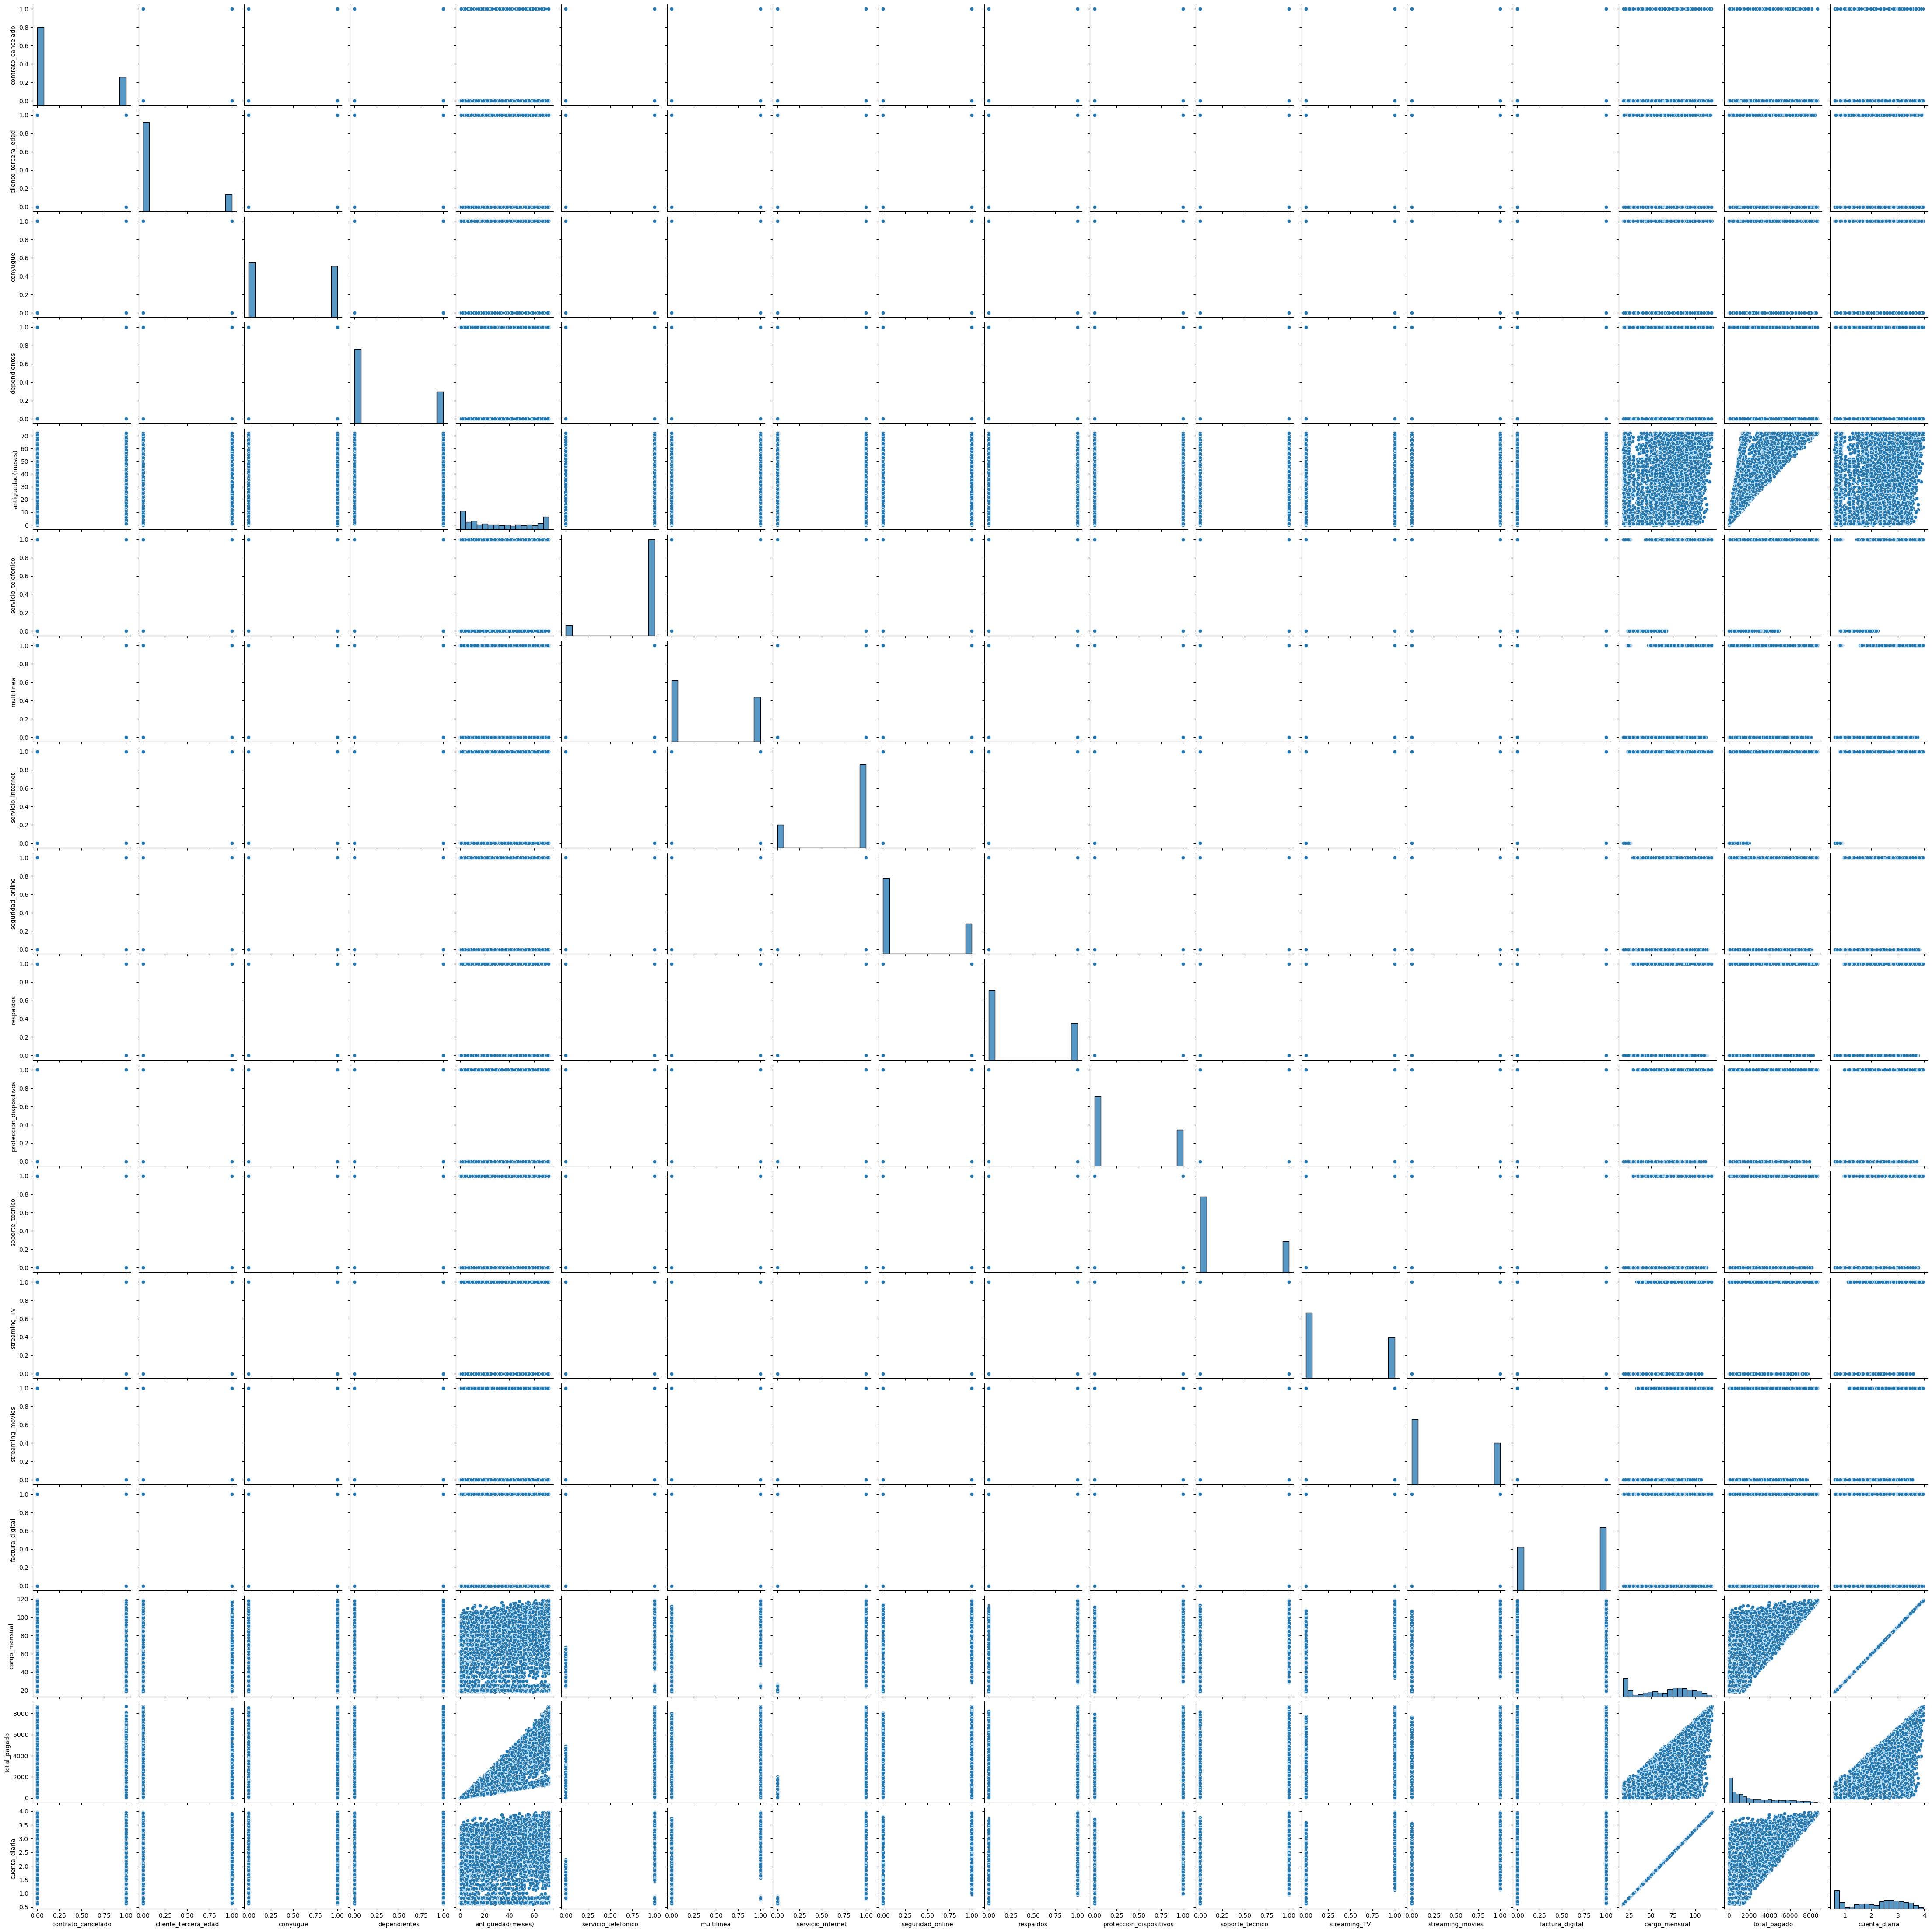

In [60]:
sns.pairplot(data)

In [61]:
data.shape

(7043, 22)

In [74]:
pd.crosstab(data['tipo_conexion'],data['contrato_cancelado'])

contrato_cancelado,0.0,1.0
tipo_conexion,,
DSL,1962,459
Fiber optic,1799,1297
sin conexion,1413,113


In [62]:
fig = px.box(data,x='antiguedad(meses)',color='contrato_cancelado')
fig


In [63]:
# total_pagado
fig = px.box(data,x='total_pagado',color='contrato_cancelado')
fig


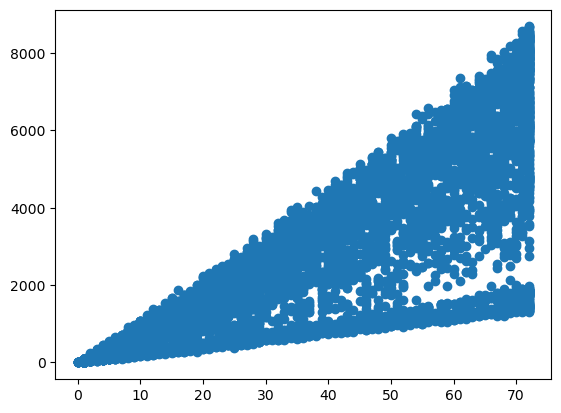

In [64]:
plt.scatter(x=data['antiguedad(meses)'],y=data['total_pagado'])